<a href="https://colab.research.google.com/github/BernardOforiBoateng/Hamoye_Stage_E_Quiz/blob/main/Practical_Time_Series_Analysis_%26_Forecast_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Hamoye Internship/Practical Time Series Analysis & Forecast/Time_series_analysis_and_forecast_DATASET.csv")

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
#check for missing values
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [7]:
df.shape

(92016, 5)

In [8]:
df["FullDate"] = pd.to_datetime(df["FullDate"]) #convert column to datetime

df.set_index("FullDate", inplace=True)

df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:
#Upsample to daily data points
df_daily = df.resample('D').mean()

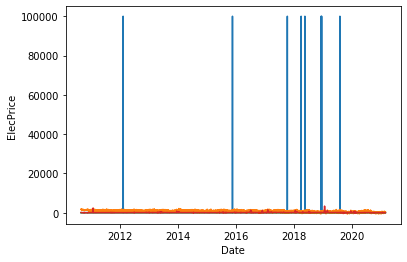

In [10]:
plt.xlabel("Date")
plt.ylabel("ElecPrice")
plt.plot(df_daily)

In [11]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -3.6901589888366413
p-value: 0.0042537255045741835
No. of lags used: 30
No. of observations used : 3803
Critical Values:
   1%: -3.432070672988693
   5%: -2.8623002987378547
   10%: -2.567174716967499


In [12]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -2.902766697165181
p-value: 0.045027212884625294
No. of lags used: 27
No. of observations used : 3806
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [13]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -8.269053866873804
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


In [14]:
# lets make a copy of our dataset
df_copy = df.copy()

In [15]:
df_copy.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Smoothing Time Series Data

In [16]:
#Smoothing Time Series Data
df_MA = df.copy()
MA = df_MA['ElecPrice'].rolling(12).mean()

Time Series Specific Exploratory Methods

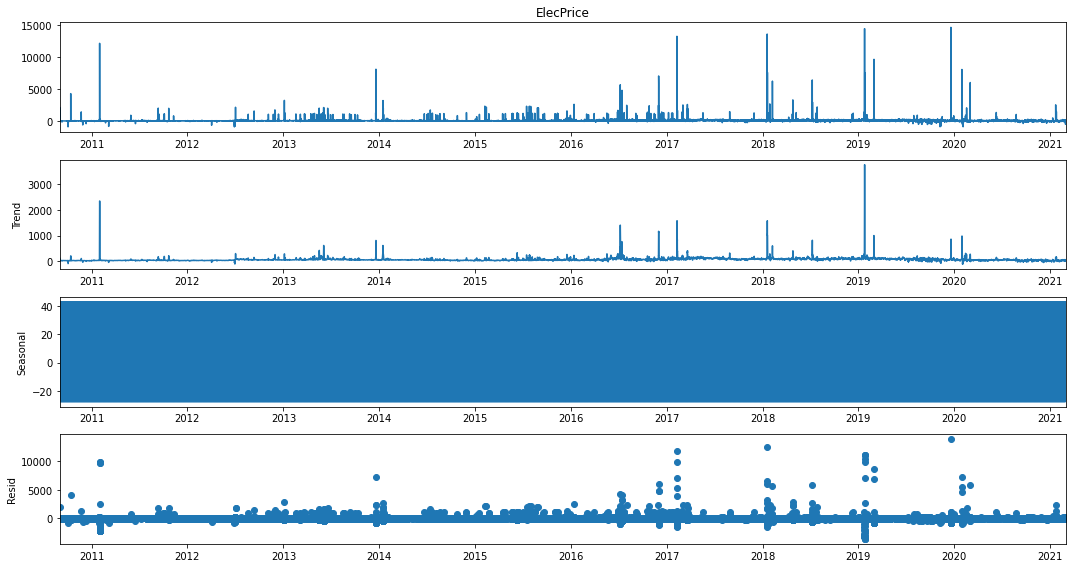

In [17]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

The decomposed time series show no obvious increasing trend and seasonality variations. This suggests that the data is stationary. We will now perform an ADF test to confirm this speculation

In [18]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
   1%: -3.430421110703783
   5%: -2.8615714297867108
   10%: -2.56678672898094


p-value of 0 and the test statistic is less than the critical values which means the null hypothesis is rejected and the test is statistically significant.

Using the daily sampling rate (sum) to divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset.

In [19]:
# splitting dataframe by row index
df_train = df.iloc[:2757,:]
df_test = df.iloc[2757:,:]
print("Shape of new dataframes - {} , {}".format(df_train.shape, df_test.shape))

Shape of new dataframes - (2757, 4) , (89259, 4)


In [20]:
df_train.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [21]:
# Using DataFrame.copy() create new DaraFrame.
df2 = df_train[[ 'ElecPrice']].copy()

In [22]:
df2

,ElecPrice
FullDate,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030
...,...
2010-12-24 16:00:00,36.770
2010-12-24 17:00:00,35.060
2010-12-24 18:00:00,27.980


## **Time Series Forecasting Using Stochastic Models**

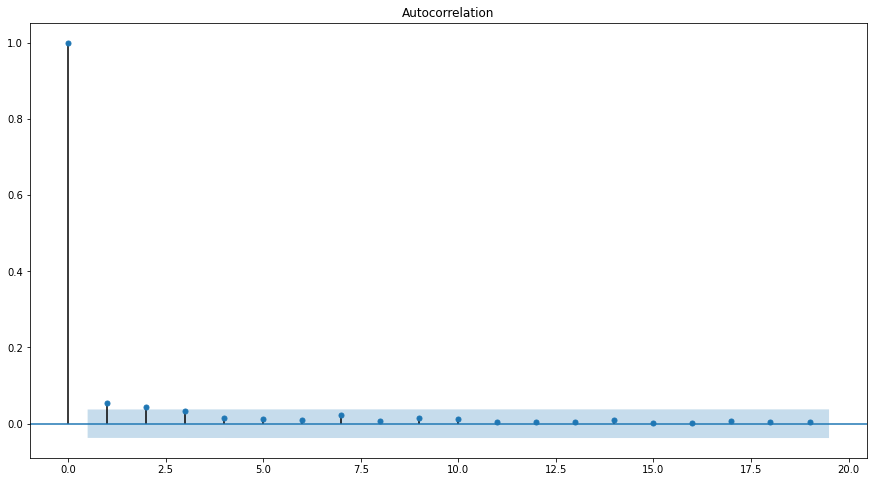

<function matplotlib.pyplot.show(*args, **kw)>

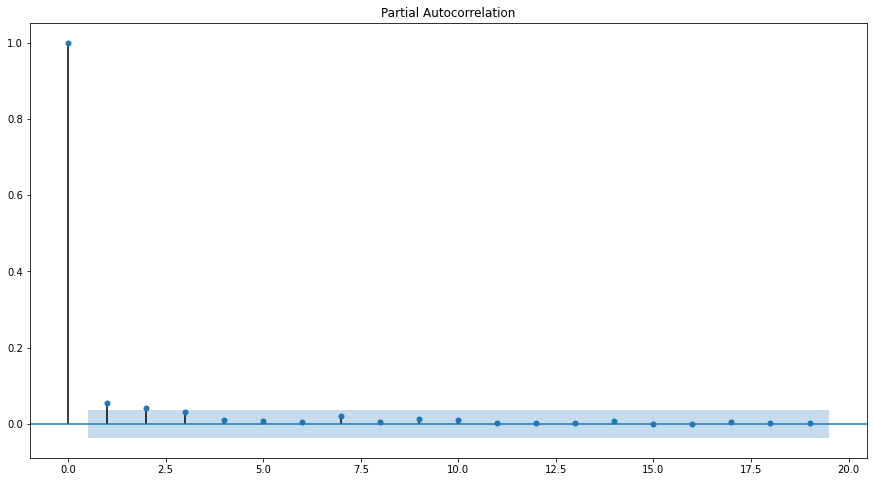

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df2, lags = range(0, 20))
plt.show()
#PACF
plot_pacf(df2, lags = range(0, 20))
plt.show

The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively. In both plots, p=q=1.

The shaded regions in the plots are the confidence intervals. The lags where the PACF and #ACF charts cross this region are the values for p and q respectively. In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly #in the PACF plot, p=2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be use

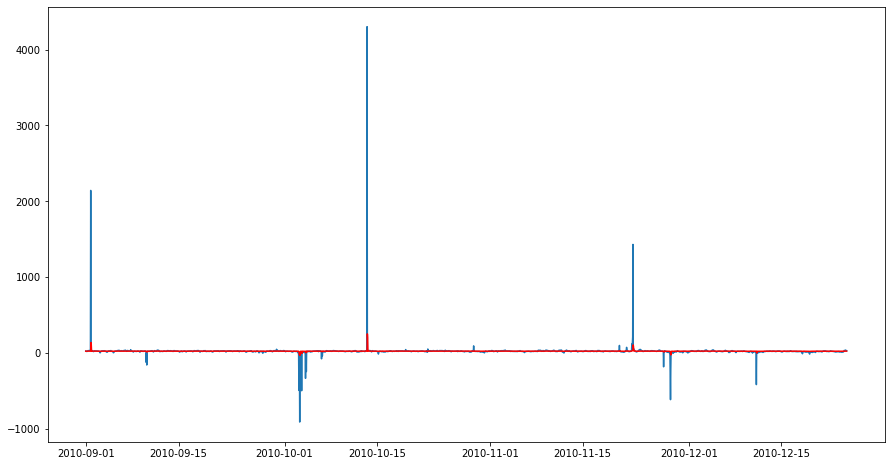

In [24]:
#AR, MA and ARIMA
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df2, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df2)
plt.plot(AR_model_results.fittedvalues, color='red')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


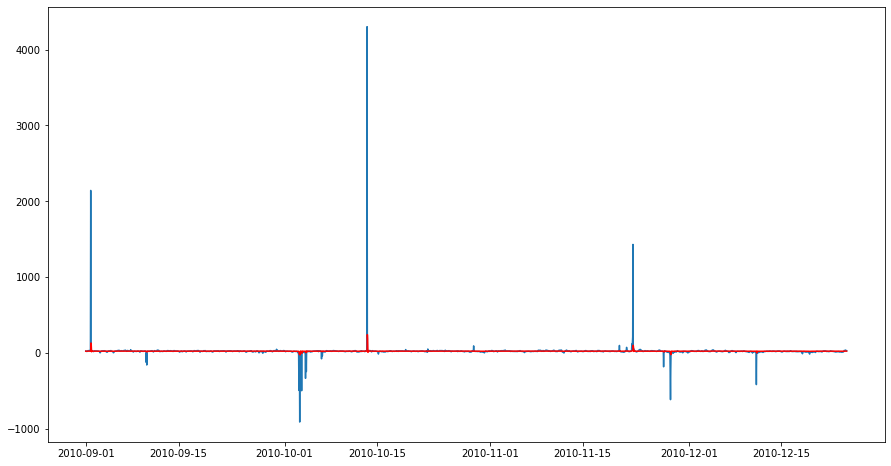

In [25]:
MA_model = ARIMA(df2, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df2)
plt.plot(MA_model_results.fittedvalues, color='red')

## **Time Series at Scale**

In [26]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 129 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638497 sha256=c2be9753fd8cbb21c8f56cb4f22a1c16a793be3ee24585fa9110ab6a233f4449
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [27]:
from fbprophet import Prophet
df=pd.read_csv("/content/drive/MyDrive/Hamoye Internship/Practical Time Series Analysis & Forecast/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [28]:
# splitting dataframe by row index
df_train1 = df.iloc[:2757,:]
df_test1 = df.iloc[2757:,:]
print("Shape of new dataframes - {} , {}".format(df_train.shape, df_test.shape))

Shape of new dataframes - (2757, 4) , (89259, 4)


In [29]:
# Using DataFrame.copy() create new DaraFrame.
df_1 = df_train1[['FullDate', 'ElecPrice']].copy()

In [30]:
df_2 = df_1.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_2.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [31]:
model = Prophet()
model.fit(df_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [32]:
forecast = model.predict(df_2) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,44.777554,-76.284171,172.594157,37.069420,37.069420,37.069420
1,2010-09-01 01:00:00,43.733402,-80.650531,163.787225,37.021443,37.021443,37.021443
2,2010-09-01 02:00:00,40.148666,-85.312877,170.665019,36.973466,36.973466,36.973466
3,2010-09-01 03:00:00,36.121575,-89.882379,163.415777,36.925489,36.925489,36.925489
4,2010-09-01 04:00:00,33.589300,-87.490585,157.294862,36.877512,36.877512,36.877512
...,...,...,...,...,...,...,...
2752,2010-12-24 16:00:00,15.955556,-108.374284,142.416523,13.773398,13.773398,13.773398
2753,2010-12-24 17:00:00,21.142924,-106.602917,150.013506,13.762842,13.762842,13.762842
2754,2010-12-24 18:00:00,23.717932,-108.809863,141.050426,13.752286,13.752286,13.752286
2755,2010-12-24 19:00:00,21.749101,-111.731658,149.735962,13.741730,13.741730,13.741730


In [33]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,44.777554,-81.124401,173.160012,37.069420,37.069420,37.069420
1,2010-09-01 01:00:00,43.733402,-89.384447,181.704160,37.021443,37.021443,37.021443
2,2010-09-01 02:00:00,40.148666,-84.252290,171.418404,36.973466,36.973466,36.973466
3,2010-09-01 03:00:00,36.121575,-93.067164,160.672515,36.925489,36.925489,36.925489
4,2010-09-01 04:00:00,33.589300,-90.019998,162.211053,36.877512,36.877512,36.877512
...,...,...,...,...,...,...,...
2762,2011-05-31 20:00:00,-20.629269,-254.577240,216.567346,-26.297648,-229.862302,161.645107
2763,2011-06-30 20:00:00,-38.075065,-315.759044,236.369795,-33.898057,-292.116093,206.856213
2764,2011-07-31 20:00:00,-45.778875,-378.828139,300.838730,-41.751813,-363.733350,269.310861
2765,2011-08-31 20:00:00,-33.048773,-465.996958,374.703790,-49.605569,-444.903659,329.743224


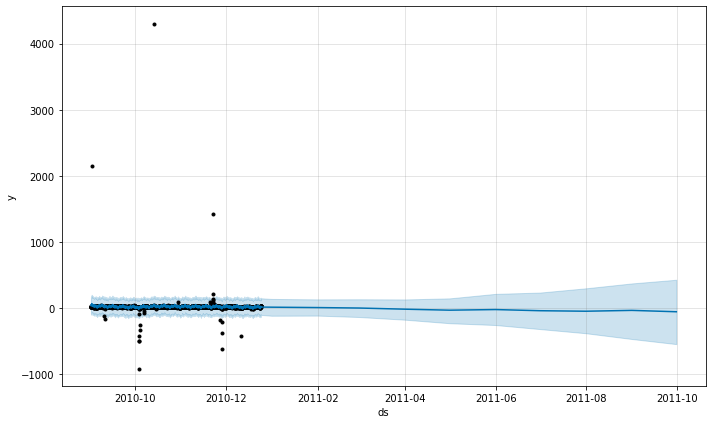

In [34]:
model.plot(forecast)
plt.show()

# Part B

multivariate forecast model to forecast the last x-2757 days of ElecPrice

In [35]:
df["FullDate"] = pd.to_datetime(df["FullDate"]) #convert column to datetime


df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [36]:
df_0 = df.rename(columns={'FullDate': 'ds', 'ElecPrice': "y", 'Tmax': 'add1', 'SysLoad': 'add2', 'GasPrice': 'add3'})
df_0.head()

,ds,add1,add2,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [37]:
# splitting dataframe by row index
df_train1 = df_0.iloc[:2757,:]
df_test1 = df_0.iloc[2757:,:]

In [38]:
#last x-2757 days of ElecPrice
df_test1.shape

(89259, 5)

In [39]:
df_test1.head()

,ds,add1,add2,add3,y
2757,2010-12-24 21:00:00,33.3,1513.57905,3.0988,24.870
2758,2010-12-24 22:00:00,33.3,1341.05455,3.0988,22.820
2759,2010-12-24 23:00:00,33.3,1135.43285,3.0988,21.185
2760,2010-12-25 00:00:00,31.7,1169.16690,3.0988,20.120
2761,2010-12-25 01:00:00,31.7,1209.20920,3.0988,18.065


Before training the forecaster, we can add regressors that use the additional variables. Here the argument of add_regressor is the column name of the additional variable in the training and test dataset.

In [40]:
# multivariate forecast model to forecast the last x-2757 days of ElecPrice
from fbprophet import Prophet
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')
m.fit(df_test1)

In [41]:
#The predict method will then use the additional variables to forecast:

forecast = m.predict(df_test1.drop(columns="y"))

In [42]:
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-12-24 21:00:00,36.251509,-246.063581,303.958826,54.312965,54.312965,54.312965
1,2010-12-24 22:00:00,22.954207,-242.966812,285.095383,54.311437,54.311437,54.311437
2,2010-12-24 23:00:00,13.555104,-253.922516,292.947167,54.309909,54.309909,54.309909
3,2010-12-25 00:00:00,20.167974,-245.595497,299.486393,54.308381,54.308381,54.308381
4,2010-12-25 01:00:00,22.175119,-237.052451,289.710918,54.306852,54.306852,54.306852
...,...,...,...,...,...,...,...
89254,2021-02-28 19:00:00,38.631692,-228.164698,305.491123,75.892385,75.892385,75.892385
89255,2021-02-28 20:00:00,48.106366,-211.854272,306.516336,75.892352,75.892352,75.892352
89256,2021-02-28 21:00:00,33.135097,-259.409327,293.759072,75.892319,75.892319,75.892319
89257,2021-02-28 22:00:00,29.168481,-254.664640,282.654712,75.892286,75.892286,75.892286


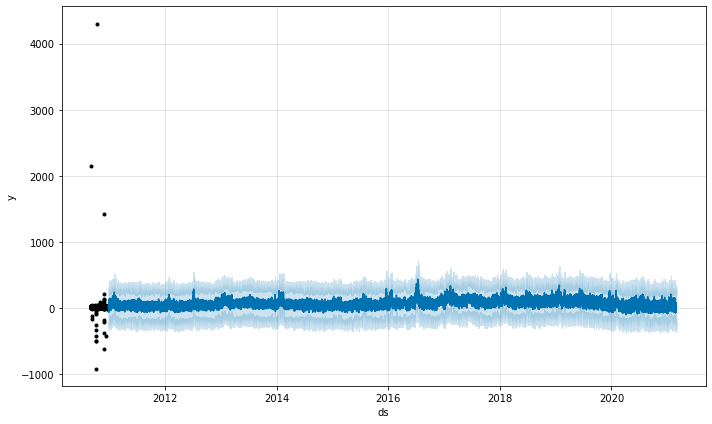

In [43]:
model.plot(forecast)
plt.show()